In [16]:
import traceback
import numpy as np
from scipy.interpolate import UnivariateSpline
from scipy.ndimage import binary_dilation
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
%matplotlib inline

from extract_centerline import extract_centerline

In [ ]:
# download dataset
https://cs.stanford.edu/~acoates/stl10/
https://www.tensorflow.org/api_docs/python/tf/data/Dataset
    
# add lines to images.

# create label
# grid - endpoint, line mask, startpoint
# train yolo with images with line
#

In [ ]:
# make line
from skimage import data
from skimage import color
from skimage import io

baseimg = getattr(data,'astronaut')()
baseimg = color.rgb2gray(baseimg)
print(baseimg.shape)
nx,ny = 512,512
nx,ny = baseimg.shape
sz = (nx,ny)
canvas = np.zeros(sz)
print(canvas.shape)

In [3]:
from scipy.interpolate import UnivariateSpline

def smooth_line(x,y,num=None,**kwargs):
    if num is None:
        num = len(x)
    w = np.arange(0,len(x),1)
    sx = UnivariateSpline(w,x,**kwargs)
    sy = UnivariateSpline(w,y,**kwargs)
    wnew = np.linspace(0,len(x),num)
    return sx(wnew),sy(wnew)

184 184


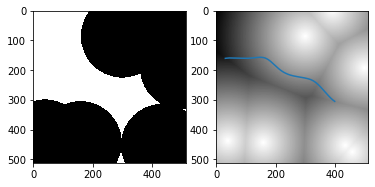

In [57]:
def make_image():
    nx,ny = 512,512
    sz = (nx,ny)
    canvas = np.zeros(sz)

    peak_num = np.random.randint(0,10,1)[0]
    for n in range(peak_num):
        x = np.random.choice(np.linspace(0, nx-1, nx),1).astype(np.int)[0]
        y = np.random.choice(np.linspace(0, ny-1, ny),1).astype(np.int)[0]
        canvas[x,y]=1

    distance = ndi.distance_transform_edt(np.logical_not(canvas))
    terrain = ndi.morphology.distance_transform_edt(distance)
    terrain = -1*terrain + -1*np.min(-1*terrain)


    prct = np.random.randint(25,75,1)[0]
    th = np.percentile(terrain.ravel(),prct)
    mask = terrain<th
    mask = np.expand_dims(mask,axis=-1)
    minlen = 100
    while True:
        pt = []
        for n in range(2):
            breakok = False
            while True:
                x = np.random.choice(np.linspace(0, nx-1, nx),1).astype(np.int)[0]
                y = np.random.choice(np.linspace(0, ny-1, ny),1).astype(np.int)[0]
                z = 0
                if len(pt)==0 and mask[x,y,z] == 1:
                    breakok = True
                if len(pt)==1 and mask[x,y,z] == 1 and \
                    np.abs(x-pt[0][0]) > minlen and np.abs(y-pt[0][1]) > minlen:
                    breakok = True
                if breakok:
                    break
            pt.append((x,y,z))
        start_point = pt[0]
        end_point = pt[1]
        line = extract_centerline(mask,start_point,end_point)
        linexorg,lineyorg,linez=line
        smothing_factor=np.random.rand()*1000
        try:
            linex,liney = smooth_line(linexorg,lineyorg,num=100*len(linexorg),s=smothing_factor)
        except:
            pass
        if len(linexorg) > 10:
            break
    mask = mask.squeeze()
    return mask, terrain, linexorg,lineyorg, linex, liney

mask, terrain, linexorg,lineyorg, linex, liney = make_image()

plt.subplot(121)
plt.imshow(mask.squeeze(),cmap='gray')
plt.subplot(122)
plt.imshow(terrain,cmap='gray')
plt.plot(liney,linex)

print(len(linexorg),len(lineyorg))
